In [42]:
# !pip install PyPDF2
# !pip install PyMuPDF

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from PyPDF2 import PdfReader
from io import BytesIO
import os
import fitz
import requests

from PIL import Image
import math
from math import sqrt
import cv2

## Model Answer

In [73]:
uploaded_model = files.upload()
file_name = list(uploaded_model.keys())[0]

def extract_text_from_pdf(pdf_content):

  reader = PdfReader(BytesIO(pdf_content))
  text = ''
  for page_num in range(len(reader.pages)):
    page = reader.pages[page_num]
    text += page.extract_text() + "\n"
  return text


model_ans = extract_text_from_pdf(uploaded_model[file_name])

In [46]:
print(model_ans)

An algorithm is a finite set of instructions carried out in a specific order to 
perform a particular task  or solve a particular problem.  
 
 
 
Study of algorithms contains  analyzing their efficiency, scalability, and other 
crucial properties that determi nes whether the algorithm is suitable or not . 




## User Report

In [47]:
uploaded_report = files.upload()
file_name = list(uploaded_report.keys())[0]

def pdf_to_images(pdf_path, output_folder, resolution=300):

    images=[]

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the PDF file
    pdf_document = fitz.open(pdf_path)


    for page_number in range(len(pdf_document)):
        # Get the page
        page = pdf_document[page_number]

        matrix = fitz.Matrix(resolution/72, resolution/72)
        image = page.get_pixmap(matrix=matrix)

        output_image_path = os.path.join(output_folder, f"page_{page_number + 1}.png")

        image.save(output_image_path)
        images.append(output_image_path)

    pdf_document.close()
    return images


pdf_filename = file_name
output_folder = "output_images"

images=pdf_to_images(pdf_filename, output_folder, 300)

Saving Scan_2024.pdf to Scan_2024 (2).pdf


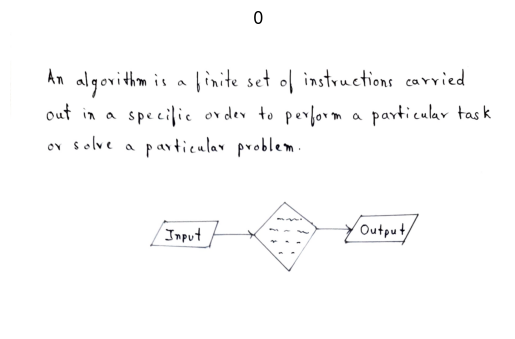

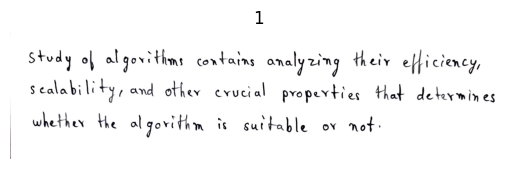

In [48]:
for i in range(len(images)):
  img=plt.imread(images[i])
  plt.imshow(img)
  plt.title(i)
  plt.axis('off')
  plt.show()

In [49]:
# image = cv2.imread(images[0])
# image

## Diagram Similarity (if present)

In [50]:
files = files.upload()

sample_image = Image.open(list(files.keys())[0])


# # converting to 8 bit images
# img1 = image1.convert('L')
# img1.save("path.jpg")
img1 = sample_image.convert('L')

Saving Screenshot 25.png to Screenshot 25 (2).png


In [51]:
def separate_diagram(image_path,threshold):

    image = cv2.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # contour with the largest area (likely the diagram)
    max_contour = max(contours, key=cv2.contourArea)
    max_area = cv2.contourArea(max_contour)

    if max_area<threshold:
      # print("No Diagram")
      return None
    # print(max_area)

    x, y, w, h = cv2.boundingRect(max_contour)
    side_length = max(w, h)

    # Ensure the square fits within the image dimensions
    side_length = min(side_length, min(image.shape[:2]))

    # Crop
    cropped_diagram = image[y:y + side_length, x:x + side_length]

    return cropped_diagram



In [52]:
isdiagram=False

for i in range(len(images)):
  diagram = separate_diagram(images[i],5000)
  if diagram is not None:
    isdiagram=True
    break

print(i)
isdiagram

0


True

In [53]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [54]:
diagram_marks=0

if isdiagram:
  img_arr1 = np.array(diagram)
  img_arr2 = np.array(img1)

  flat_img1=img_arr1.flatten()
  flat_img2=img_arr2.flatten()

  # normalizing
  norm_img1 = flat_img1/255.0
  norm_img2 = flat_img2/255.0

  similarity=cosineSim(norm_img1,norm_img2)*100
  print("Diagram Similarity:",end=" ")
  print(round(similarity, 2))

  if round(similarity, 2)>0.95:
    diagram_marks=5
  elif round(similarity, 2)>0.9:
    diagram_marks=4
  elif round(similarity, 2)>0.85:
    diagram_marks=3
  elif round(similarity, 2)>0.8:
    diagram_marks=2
  elif round(similarity, 2)>0.75:
    diagram_marks=1
  else:
    diagram_marks=0


Diagram Similarity: 98.45


In [55]:
diagram_marks

5

## Handwritten text detection

In [56]:
# !pip install paddlepaddle
# !pip install paddleocr==2.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: paddleocr
    Found existing installation: paddleocr 2.7.5
    Uninstalling paddleocr-2.7.5:
      Successfully uninstalled paddleocr-2.7.5


In [57]:
# !pip install pyspellchecker
# !python -m spacy download en_core_web_lg

In [58]:
from paddleocr import PaddleOCR
ocr = PaddleOCR(use_angle_cls=True,lang='en')

from textblob import TextBlob
from spellchecker import SpellChecker
import re

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 9.01MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:00<00:00, 14.0MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:01<00:00, 1.22MiB/s]

[2024/03/29 12:03:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [59]:
def check(res):
  str=re.findall("[a-zA-Z]+",res)
  updated_res=(" ".join(str))
  spell = SpellChecker()
  misspelled = spell.unknown(str)

  if len(updated_res)==0:
    return 100000                           # if len is 0, avoid this case
  return(len(misspelled)/len(updated_res))      # ratio of errors to word


In [60]:
def correct(text):
  # txt = TextBlob(text)
  # return txt.correct()
  spell = SpellChecker()
  words = text.split()
  corrected_text = []

  for word in words:
      corrected_word = spell.correction(word)

      if corrected_word is None:
          corrected_word = word

      corrected_text.append(corrected_word)

  corrected_text = " ".join(corrected_text)
  return corrected_text

In [61]:
def text_to_img(file_name):
  image = cv2.imread(file_name)
  h, w = image.shape[:2]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # Sum white pixels in each row
  # Create blank space array and and final image
  pixels = np.sum(thresh, axis=1).tolist()
  space = np.ones((4, w), dtype=np.uint8) * 255
  result = np.zeros((0, w), dtype=np.uint8)

  # Iterate through each row and add space if entire row is empty
  # otherwise add original section of image to final image
  for index, value in enumerate(pixels):
      if value == 0:
          result = np.concatenate((result, space), axis=0)
      row = gray[index:index+1, 0:w]
      result = np.concatenate((result, row), axis=0)


  img_read=result

  # global thresholding
  retval, img_thresh1=cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
  retval, img_thresh2=cv2.threshold(img_read, 120, 255, cv2.THRESH_BINARY)

  # adaptive thresholding
  img_thresh_adap=cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)

  result1 = ocr.ocr(img_read)
  result2 = ocr.ocr(img_thresh1)
  result3 = ocr.ocr(img_thresh2)
  result4 = ocr.ocr(img_thresh_adap)

  str1=""
  if result1[0] is not None:
    for i in range(len(result1[0])):
      str1=str1+result1[0][i][1][0]+" "


  print()
  str2=""
  if result2[0] is not None:
    for i in range(len(result2[0])):
      str2=str2+result2[0][i][1][0]+" "


  print()
  str3=""
  if result3[0] is not None:
    for i in range(len(result3[0])):
      str3=str3+result3[0][i][1][0]+" "


  print()
  str4=""
  if result4[0] is not None:
    for i in range(len(result4[0])):
      str4=str4+result4[0][i][1][0]+" "


  best=""
  minm = min(check(str1), check(str2), check(str3), check(str4))

  if minm==check(str1):
    best=str1
  elif minm==check(str2):
    best=str2
  elif minm==check(str3):
    best=str3
  else:
    best=str4

  return correct(best)


In [62]:
eval_text=""

for i in range(len(images)):
  txt=text_to_img(images[i])
  eval_text=eval_text+txt+" "

print(eval_text)

[2024/03/29 12:03:45] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.509774923324585
[2024/03/29 12:03:45] ppocr DEBUG: cls num  : 3, elapsed : 0.05257868766784668
[2024/03/29 12:03:46] ppocr DEBUG: rec_res num  : 3, elapsed : 0.481234073638916
[2024/03/29 12:03:46] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.16595673561096191
[2024/03/29 12:03:46] ppocr DEBUG: cls num  : 3, elapsed : 0.01111292839050293
[2024/03/29 12:03:46] ppocr DEBUG: rec_res num  : 3, elapsed : 0.3975982666015625
[2024/03/29 12:03:47] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.15564227104187012
[2024/03/29 12:03:47] ppocr DEBUG: cls num  : 3, elapsed : 0.018705129623413086
[2024/03/29 12:03:47] ppocr DEBUG: rec_res num  : 3, elapsed : 0.49106311798095703
[2024/03/29 12:03:47] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.17200803756713867
[2024/03/29 12:03:47] ppocr DEBUG: cls num  : 4, elapsed : 0.029374361038208008
[2024/03/29 12:03:48] ppocr DEBUG: rec_res num  : 4, elapsed : 0.5926568508148193



[2024/03/29 12:03:49]

## Answer Evaluation

In [63]:
import re
import spacy
import os
import nltk
nltk.download('punkt')
import nltk.corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [64]:
str=re.findall("[a-zA-Z]+",eval_text)
updated_ans=(" ".join(str))
print(updated_ans)

An algorithm is a finite set of instructions carried Out in a specific order to perform a particular task or Solve a particular problem algorithms contains analyzing their efficiency and other crucial properties that determines whether the algorithm is suitable or not


In [65]:
nlp=spacy.load("en_core_web_lg")
v1=nlp(model_ans)
v2=nlp(updated_ans)

sim=v1.similarity(v2)
sim

0.9910779435292508

In [66]:
#marks evaluation
marks=0
if sim>0.995:
  marks=10
elif sim>0.99:
  marks=9
elif sim>0.97:
  marks=8
elif sim>0.95:
  marks=7
elif sim>0.92:
  marks=6
elif sim>0.90:
  marks=4
elif sim>0.87:
  marks=3
elif sim>0.82:
  marks=2
elif sim>0.78:
  marks=1
else:
  marks=0



In [67]:
total_marks=diagram_marks+marks

if isdiagram:
  print("Total Marks out of 15: ",total_marks)
else:
  print("Total Marks out of 10: ",total_marks)

Total Marks out of 15:  14
